<a href="https://colab.research.google.com/github/YumcoderCom/YumcoderCom-ml-datathon-5-team-19/blob/main/team_19_datathon_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Group 19

 **Amanda Rahmadian, Paijani Sheth, Omid Jafainezhad**

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Import file
from google.colab import files
uploaded = files.upload()

Saving mhealth.csv to mhealth.csv


In [3]:

# Load the CSV file into a DataFrame
data = pd.read_csv('mhealth.csv')

data.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1


In [4]:
# Group the dataset by the 'subject' column and apply the `len` function to each group to get the number of records for each patient.
patients_with_2_or_more_records = (data.groupby('subject').apply(len) >= 2)

# Filter the original dataset to include only those patients who have 2 or more records.
# This is done by first creating a boolean series `patients_with_2_or_more_records` where the index is 'subject' and the value is True if the patient has 2 or more records, False otherwise.
# Then, using `isin` method to filter `diabetes_data` so that it only includes rows where 'subject' matches those in the `patients_with_2_or_more_records` series that are True.
patients_with_2_or_more_records_df = data[data['subject'].isin(patients_with_2_or_more_records[patients_with_2_or_more_records].index)]


# Update the original 'data' dataframe with the filtered dataframe.
# This step replaces the original dataset with the subset of patients who have 2 or more records.
data = patients_with_2_or_more_records_df

In [5]:
# Are there any missing data?

# Calculating the missing threshold based on the sampled data
missing_threshold = 0.5 * len(data)

# Identifying columns with more than 50% missing values in the sampled data
columns_to_drop = data.columns[data.isnull().sum() > missing_threshold]

# Calculating the number of missing values in each column of the sampled dataset
missing_values = data.isnull().sum()

missing_values, columns_to_drop

(alx         0
 aly         0
 alz         0
 glx         0
 gly         0
 glz         0
 arx         0
 ary         0
 arz         0
 grx         0
 gry         0
 grz         0
 Activity    0
 subject     0
 dtype: int64,
 Index([], dtype='object'))

No missing data in each column.

# **Exploratory Data Analysis**

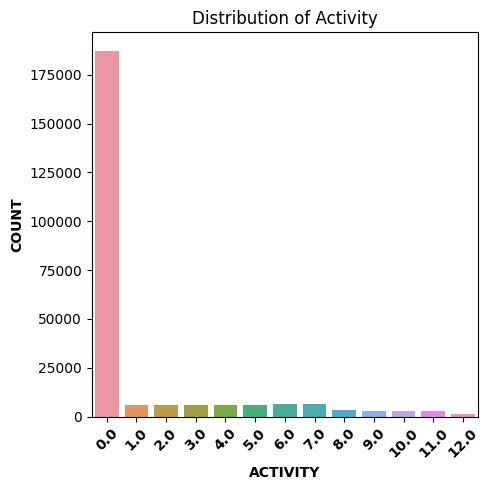

In [ ]:
# Explore distribution of 'Activity'

import matplotlib.pyplot as plt
import seaborn as sns

sns.color_palette("magma", as_cmap=True)

# Activity Distribution with updated color palette
plt.figure(figsize=(5, 5))
sns.countplot(x='Activity', data=data)
plt.title('Distribution of Activity')
plt.xlabel('ACTIVITY', fontweight='bold')
plt.ylabel('COUNT', fontweight='bold')
plt.xticks(rotation=45, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
updated_race_distribution_fig = plt.gcf()
plt.show()

In [ ]:
# Check with pie chart
import plotly.express as px

# Compute the count of each activity in the 'Activity' column
counts = data['Activity'].value_counts()

# Define colors for the pie chart sections
colors = ['#a3416c', '#ebc898']

# Construct a pie chart with plotly
# 'names' are the class labels, and 'values' are the counts for each class
fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # creates a donut-styled pie chart
    title='Distribution of Activity',
    color_discrete_sequence=colors
)

# Update the layout of the pie chart for better presentation and clarity
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='target'
    ),
    title=dict(
        text='Distribution of Activity levels',
        x=0.45,
        xanchor='center',
        y=0.95,
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

# Display the pie chart
fig.show()

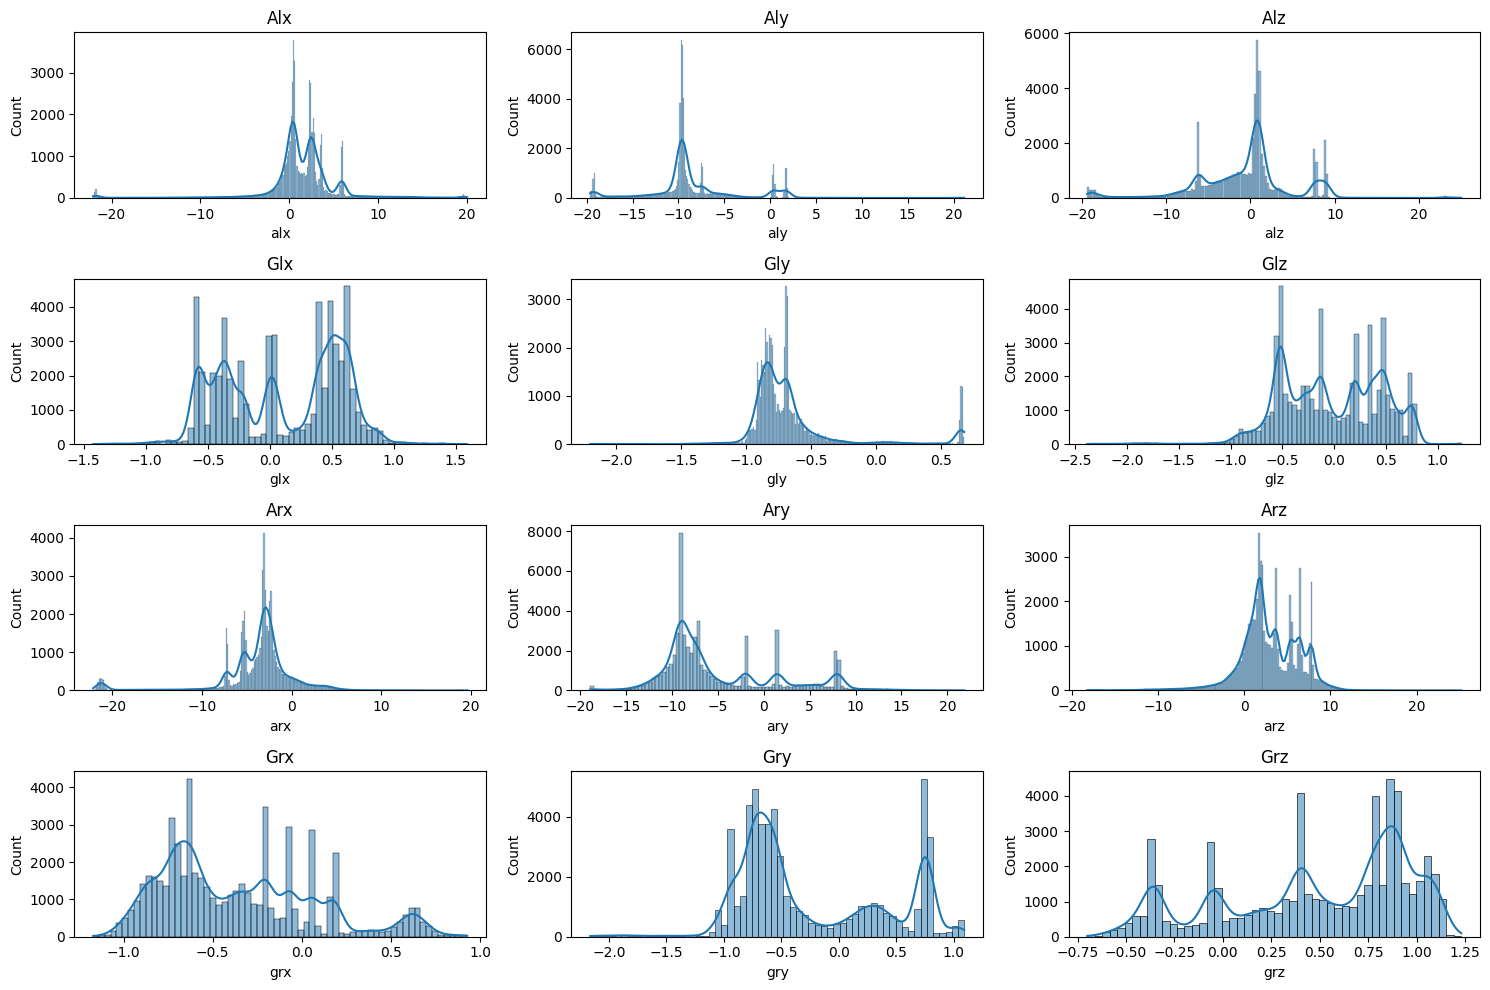

In [ ]:
# Explore features
import matplotlib.pyplot as plt
import seaborn as sns

selected_columns_for_analysis = [
    'alx', 'aly', 'alz',	'glx',	'gly',	'glz',
    'arx',	'ary',	'arz',	'grx',	'gry',	'grz'
]

# Create a grid of subplots with 4 rows and 3 columns
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(15, 10))

# Loop over each selected feature to create a subplot for each
for i, column in enumerate(selected_columns_for_analysis):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // 3
    y = i % 3

    # Plot a histogram of each feature
    sns.histplot(data, x=column, kde=True, palette='rocket', ax=axs[x, y])
    axs[x, y].set_title(column.replace('_', ' ').title())

# Adjust the layout and display all the subplots
plt.tight_layout()
plt.show()

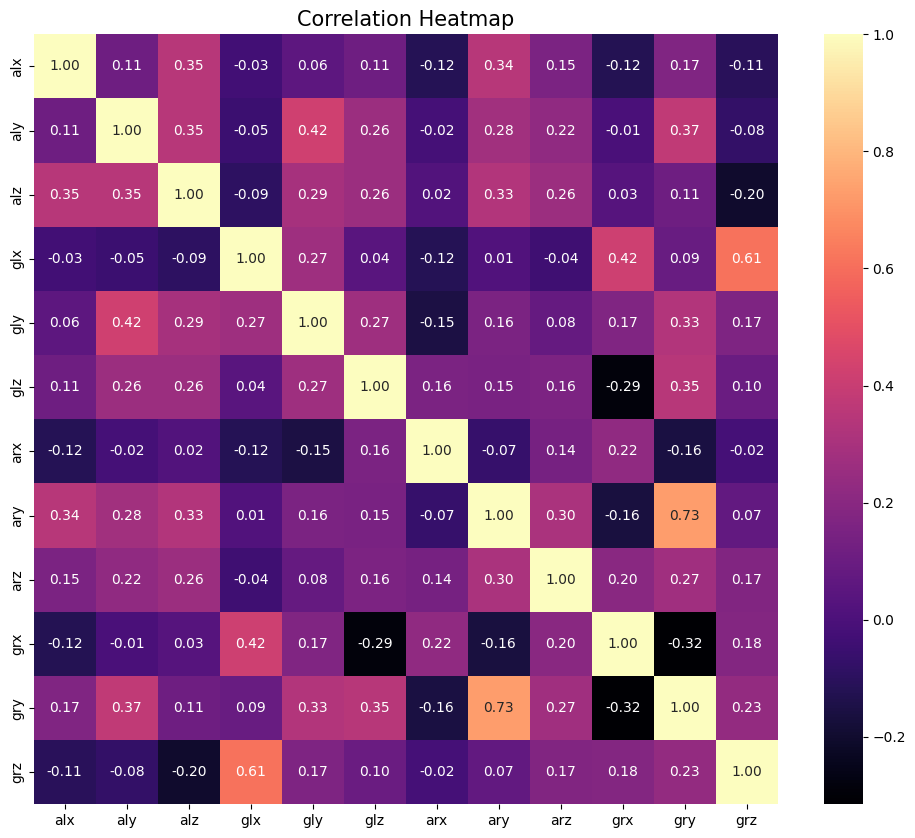

In [ ]:
import numpy as np

# For the correlation heatmap, we'll use only numerical columns.
correlation_matrix = data[selected_columns_for_analysis].corr()

# Plot the updated correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='magma')
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

## Predict the activity
This Python code utilizes the TensorFlow and Keras libraries to construct and train a Long Short-Term Memory (LSTM) neural network on time-series data. The primary objective of this code is to forecast the activity by analyzing sequences of sensor data collected from wearable devices.

In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

df = data

# Group by 'subject' and create sequences
grouped = df.groupby('subject', sort=False)
sequences = [group.drop(columns=['subject', 'Activity']).values for _, group in grouped]
targets = [group['Activity'].iloc[-1] for _, group in grouped]  # Assuming all records for a subject have the same target

# Padding sequences
max_length = max(len(s) for s in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', dtype='float32')

# Convert targets to NumPy array
targets = np.array(targets)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, targets, test_size=0.2, random_state=42)

# Model architecture
model = Sequential([
    LSTM(256, input_shape=(max_length, X_train.shape[2]), return_sequences=True),
    Dropout(0.5),
    LSTM(128),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(13, activation='softmax')  # Assuming 13 activities
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=512, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Predictions on the test set
predictions = model.predict(X_test)


NameError: name 'data' is not defined

Epochs 1-5:

- The training loss decreases from 2.6151 to 2.3530, indicating that the model is learning from the training data.
- Training accuracy increases from 60% to 80%, suggesting that the model is becoming more accurate in predicting the training set.
- The validation accuracy is consistently 100.00% across all epochs, which could indicate overfitting.
- It requires a significant investment of time and resources.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load data
df = data

# Label encode 'Activity' column
label_encoder = LabelEncoder()
df['Activity'] = label_encoder.fit_transform(df['Activity'])

# Group by 'subject' and create sequences
grouped = df.groupby('subject', sort=False)
sequences = [group.drop(columns=['subject', 'Activity']).values for _, group in grouped]
targets = [group['Activity'].iloc[-1] for _, group in grouped]  # Assuming all records for a subject have the same target

# Padding sequences
max_length = max(len(s) for s in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', dtype='float32')

# Convert targets to NumPy array
targets = np.array(targets)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, targets, test_size=0.2, random_state=42)

# Model architecture
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
epochs = 5

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    history = model.fit(X_train, y_train, epochs=1, batch_size=32, validation_split=0.2, verbose=1)

    # Evaluate the model on the test set
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

    # Print training loss and accuracy
    train_loss, train_accuracy = history.history['loss'][0], history.history['accuracy'][0]
    val_loss, val_accuracy = history.history['val_loss'][0], history.history['val_accuracy'][0]
    print(f'Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}')
    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')


Epoch 1/5


The aforementioned approach is also prone to overfitting.

In the following, we explore an alternative approach that avoids overfitting.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load dataset
df = data

# Feature columns
feature_columns = ['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx', 'gry', 'grz', 'subject']

# Target column
target_column = 'Activity'

# Extract features and target
X = df[feature_columns]
y = df[target_column]

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Encode 'subject' column using OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
subject_encoded = onehot_encoder.fit_transform(df[['subject']])
subject_columns = [f'subject_{i}' for i in range(subject_encoded.shape[1])]
X[subject_columns] = subject_encoded

# Drop the original 'subject' column
X.drop(columns=['subject'], inplace=True)

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pad sequences
X_train_padded = pad_sequences(X_train, dtype='float32', padding='post', truncating='post')
X_test_padded = pad_sequences(X_test, dtype='float32', padding='post', truncating='post')

# Reshape sequences for LSTM input
X_train_padded = X_train_padded.reshape((X_train_padded.shape[0], X_train_padded.shape[1], 1))
X_test_padded = X_test_padded.reshape((X_test_padded.shape[0], X_test_padded.shape[1], 1))

# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Define the LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(X_train_padded.shape[1], X_train_padded.shape[2]), activation='relu'))
model.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile the model with class weights
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define a generator to yield batches of sequences
def sequence_generator(data, labels, batch_size):
    while True:
        indices = np.arange(data.shape[0])
        data = data[indices]
        labels = labels[indices]
        for i in range(0, data.shape[0], batch_size):
            batch_data = data[i:i + batch_size]
            batch_labels = labels[i:i + batch_size]
            yield batch_data, batch_labels

# Create generators for training and testing
batch_size = 64
train_generator = sequence_generator(X_train_padded[:, :, 0], y_train, batch_size)
test_generator = sequence_generator(X_test_padded[:, :, 0], y_test, batch_size)

# Define a callback to print epoch-wise reports
class EpochReportCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"\nEpoch {epoch + 1}/{self.params['epochs']}")
        print(f"Training - loss: {logs['loss']:.4f}, accuracy: {logs['accuracy']:.4f}")
        print(f"Validation - loss: {logs['val_loss']:.4f}, accuracy: {logs['val_accuracy']:.4f}")

# Train the model with class weights and epoch reporting callback
model.fit(train_generator, steps_per_epoch=len(X_train_padded[:, :, 0]) // batch_size, epochs=5,
          validation_data=test_generator, validation_steps=len(X_test_padded[:, :, 0]) // batch_size,
          class_weight=class_weights_dict, callbacks=[EpochReportCallback()])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(X_test_padded[:, :, 0]) // batch_size)
print(f"\nFinal Accuracy: {test_accuracy}")


Epoch 1/5
12498/12499 [============================>.] - ETA: 0s - loss: 0.9440 - accuracy: 0.3310
Epoch 1/5
Training - loss: 0.9440, accuracy: 0.3310
Validation - loss: 1.3888, accuracy: 0.5019
12499/12499 [==============================] - 125s 10ms/step - loss: 0.9440 - accuracy: 0.3310 - val_loss: 1.3888 - val_accuracy: 0.5019
Epoch 2/5
12498/12499 [============================>.] - ETA: 0s - loss: 0.3342 - accuracy: 0.6042
Epoch 2/5
Training - loss: 0.3342, accuracy: 0.6042
Validation - loss: 1.0528, accuracy: 0.6371
12499/12499 [==============================] - 125s 10ms/step - loss: 0.3342 - accuracy: 0.6042 - val_loss: 1.0528 - val_accuracy: 0.6371
Epoch 3/5
12495/12499 [============================>.] - ETA: 0s - loss: 0.2359 - accuracy: 0.6896
Epoch 3/5
Training - loss: 0.2359, accuracy: 0.6897
Validation - loss: 0.8933, accuracy: 0.7139
12499/12499 [==============================] - 125s 10ms/step - loss: 0.2359 - accuracy: 0.6897 - val_loss: 0.8933 - val_accuracy: 0.7139
E

### Final selected LSTM model

Epoch 1/10
12493/12499 [============================>.] - ETA: 0s - loss: 0.3622 - accuracy: 0.6176
Epoch 1/10
Training - loss: 0.3621, accuracy: 0.6176
Validation - loss: 0.9071, accuracy: 0.7167
12499/12499 [==============================] - 92s 7ms/step - loss: 0.3621 - accuracy: 0.6176 - val_loss: 0.9071 - val_accuracy: 0.7167
Epoch 2/10
12498/12499 [============================>.] - ETA: 0s - loss: 0.1658 - accuracy: 0.7536
Epoch 2/10
Training - loss: 0.1658, accuracy: 0.7536
Validation - loss: 0.7703, accuracy: 0.7684
12499/12499 [==============================] - 100s 8ms/step - loss: 0.1658 - accuracy: 0.7536 - val_loss: 0.7703 - val_accuracy: 0.7684
Epoch 3/10
12498/12499 [============================>.] - ETA: 0s - loss: 0.1390 - accuracy: 0.7874
Epoch 3/10
Training - loss: 0.1390, accuracy: 0.7874
Validation - loss: 0.7044, accuracy: 0.7955
12499/12499 [==============================] - 98s 8ms/step - loss: 0.1390 - accuracy: 0.7874 - val_loss: 0.7044 - val_accuracy: 0.7955


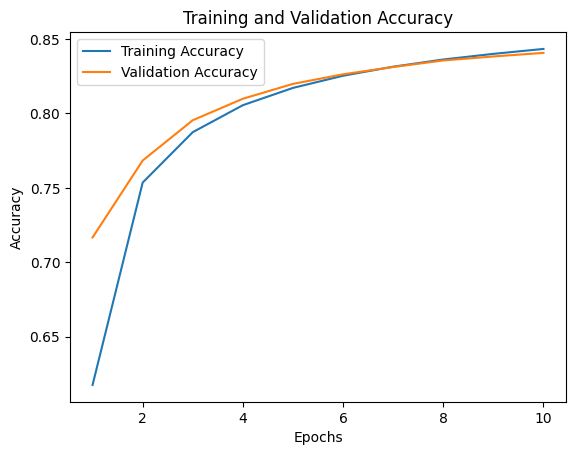

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Load dataset
df = data

# Feature columns
feature_columns = ['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx', 'gry', 'grz', 'subject']

# Target column
target_column = 'Activity'

# Extract features and target
X = df[feature_columns]
y = df[target_column]

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Encode 'subject' column using OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
subject_encoded = onehot_encoder.fit_transform(df[['subject']])
subject_columns = [f'subject_{i}' for i in range(subject_encoded.shape[1])]
X[subject_columns] = subject_encoded

# Drop the original 'subject' column
X.drop(columns=['subject'], inplace=True)

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pad sequences
X_train_padded = pad_sequences(X_train, dtype='float32', padding='post', truncating='post')
X_test_padded = pad_sequences(X_test, dtype='float32', padding='post', truncating='post')

# Reshape sequences for LSTM input
X_train_padded = X_train_padded.reshape((X_train_padded.shape[0], 1, X_train_padded.shape[1]))
X_test_padded = X_test_padded.reshape((X_test_padded.shape[0], 1, X_test_padded.shape[1]))

# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Define the LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(X_train_padded.shape[1], X_train_padded.shape[2]), activation='relu'))
model.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile the model with class weights
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define a generator to yield batches of sequences
def sequence_generator(data, labels, batch_size):
    num_samples = data.shape[0]
    num_batches = num_samples // batch_size

    while True:
        indices = np.arange(num_samples)

        for i in range(num_batches):
            start_idx = i * batch_size
            end_idx = (i + 1) * batch_size
            batch_indices = indices[start_idx:end_idx]

            batch_data = data[batch_indices]
            batch_labels = labels[batch_indices]

            yield batch_data, batch_labels

# Create generators for training and testing
batch_size = 64
train_generator = sequence_generator(X_train_padded, y_train, batch_size)
test_generator = sequence_generator(X_test_padded, y_test, batch_size)

# Define a callback to store accuracy values
class AccuracyHistory(Callback):
    def on_train_begin(self, logs={}):
        self.acc = []
        self.val_acc = []

    def on_epoch_end(self, epoch, logs={}):
        self.acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))

# Instantiate the callback
history = AccuracyHistory()

# Define a callback to print epoch-wise reports
class EpochReportCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"\nEpoch {epoch + 1}/{self.params['epochs']}")
        print(f"Training - loss: {logs['loss']:.4f}, accuracy: {logs['accuracy']:.4f}")
        print(f"Validation - loss: {logs['val_loss']:.4f}, accuracy: {logs['val_accuracy']:.4f}")

# Train the model with class weights and epoch reporting callback
model.fit(train_generator, steps_per_epoch=len(X_train_padded) // batch_size, epochs=10,
          validation_data=test_generator, validation_steps=len(X_test_padded) // batch_size,
          class_weight=class_weights_dict, callbacks=[history, EpochReportCallback()])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(X_test_padded) // batch_size)
print(f"\nFinal Accuracy: {test_accuracy}")

# Plot the training and validation accuracy across epochs
plt.plot(range(1, len(history.acc) + 1), history.acc, label='Training Accuracy')
plt.plot(range(1, len(history.val_acc) + 1), history.val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## RNN : recurrent neural network

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import Callback

# Load dataset
df = data

# Feature columns
feature_columns = ['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx', 'gry', 'grz', 'subject']

# Target column
target_column = 'Activity'

# Extract features and target
X = df[feature_columns]
y = df[target_column]

# One-hot encode the 'subject' column
X['subject'] = pd.Categorical(X['subject'])
X['subject'] = X['subject'].cat.codes

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape sequences for RNN input
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(100, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation='relu'))
model.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile the model with class weights
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define a generator to yield batches of sequences
def sequence_generator(data, labels, batch_size):
    num_samples = data.shape[0]
    num_batches = num_samples // batch_size

    while True:
        indices = np.arange(num_samples)

        for i in range(num_batches):
            start_idx = i * batch_size
            end_idx = (i + 1) * batch_size
            batch_indices = indices[start_idx:end_idx]

            batch_data = data[batch_indices]
            batch_labels = labels[batch_indices]

            yield batch_data, batch_labels

# Create generators for training and testing
batch_size = 32
train_generator = sequence_generator(X_train_reshaped, y_train, batch_size)
test_generator = sequence_generator(X_test_reshaped, y_test, batch_size)

# Define a callback to print epoch-wise reports
class EpochReportCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"\nEpoch {epoch + 1}/{self.params['epochs']}")
        print(f"Training - loss: {logs['loss']:.4f}, accuracy: {logs['accuracy']:.4f}")
        print(f"Validation - loss: {logs['val_loss']:.4f}, accuracy: {logs['val_accuracy']:.4f}")

# Train the model with class weights and epoch reporting callback
model.fit(train_generator, steps_per_epoch=len(X_train_reshaped) // batch_size, epochs=5,
          validation_data=test_generator, validation_steps=len(X_test_reshaped) // batch_size,
          class_weight=class_weights_dict, callbacks=[EpochReportCallback()])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(X_test_reshaped) // batch_size)
print(f"\nFinal Accuracy: {test_accuracy}")


Epoch 1/5
24972/24999 [============================>.] - ETA: 0s - loss: 0.4555 - accuracy: 0.5510
Epoch 1/5
Training - loss: 0.4554, accuracy: 0.5511
Validation - loss: 1.1495, accuracy: 0.6246
24999/24999 [==============================] - 18s 694us/step - loss: 0.4554 - accuracy: 0.5511 - val_loss: 1.1495 - val_accuracy: 0.6246
Epoch 2/5
24992/24999 [============================>.] - ETA: 0s - loss: 0.2576 - accuracy: 0.6690
Epoch 2/5
Training - loss: 0.2576, accuracy: 0.6690
Validation - loss: 0.9668, accuracy: 0.6947
24999/24999 [==============================] - 17s 689us/step - loss: 0.2576 - accuracy: 0.6690 - val_loss: 0.9668 - val_accuracy: 0.6947
Epoch 3/5
24979/24999 [============================>.] - ETA: 0s - loss: 0.2223 - accuracy: 0.7045
Epoch 3/5
Training - loss: 0.2223, accuracy: 0.7045
Validation - loss: 0.9702, accuracy: 0.7052
24999/24999 [==============================] - 17s 690us/step - loss: 0.2223 - accuracy: 0.7045 - val_loss: 0.9702 - val_accuracy: 0.7052
E

## Add more complex RNN model structure

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import Callback

# Load dataset
df = data

# Feature columns
feature_columns = ['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx', 'gry', 'grz', 'subject']

# Target column
target_column = 'Activity'

# Extract features and target
X = df[feature_columns]
y = df[target_column]

# One-hot encode the 'subject' column
X['subject'] = pd.Categorical(X['subject'])
X['subject'] = X['subject'].cat.codes

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape sequences for RNN input
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Define the RNN model with dropout
model = Sequential()
model.add(SimpleRNN(100, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation='relu'))
model.add(Dropout(0.2))  # Adding dropout layer
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))  # Adding dropout layer
model.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile the model with class weights
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define a generator to yield batches of sequences
def sequence_generator(data, labels, batch_size):
    num_samples = data.shape[0]
    num_batches = num_samples // batch_size

    while True:
        indices = np.arange(num_samples)

        for i in range(num_batches):
            start_idx = i * batch_size
            end_idx = (i + 1) * batch_size
            batch_indices = indices[start_idx:end_idx]

            batch_data = data[batch_indices]
            batch_labels = labels[batch_indices]

            yield batch_data, batch_labels

# Create generators for training and testing
batch_size = 32
train_generator = sequence_generator(X_train_reshaped, y_train, batch_size)
test_generator = sequence_generator(X_test_reshaped, y_test, batch_size)

# Define a callback to print epoch-wise reports
class EpochReportCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"\nEpoch {epoch + 1}/{self.params['epochs']}")
        print(f"Training - loss: {logs['loss']:.4f}, accuracy: {logs['accuracy']:.4f}")
        print(f"Validation - loss: {logs['val_loss']:.4f}, accuracy: {logs['val_accuracy']:.4f}")

# Train the model with class weights and epoch reporting callback
model.fit(train_generator, steps_per_epoch=len(X_train_reshaped) // batch_size, epochs=20,
          validation_data=test_generator, validation_steps=len(X_test_reshaped) // batch_size,
          class_weight=class_weights_dict, callbacks=[EpochReportCallback()])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(X_test_reshaped) // batch_size)
print(f"\nFinal Accuracy: {test_accuracy}")


Epoch 1/20
24941/24999 [============================>.] - ETA: 0s - loss: 0.6095 - accuracy: 0.4455
Epoch 1/20
Training - loss: 0.6092, accuracy: 0.4457
Validation - loss: 1.2398, accuracy: 0.5712
24999/24999 [==============================] - 21s 820us/step - loss: 0.6092 - accuracy: 0.4457 - val_loss: 1.2398 - val_accuracy: 0.5712
Epoch 2/20
24960/24999 [============================>.] - ETA: 0s - loss: 0.4047 - accuracy: 0.5501
Epoch 2/20
Training - loss: 0.4046, accuracy: 0.5501
Validation - loss: 1.1664, accuracy: 0.6095
24999/24999 [==============================] - 20s 805us/step - loss: 0.4046 - accuracy: 0.5501 - val_loss: 1.1664 - val_accuracy: 0.6095
Epoch 3/20
24961/24999 [============================>.] - ETA: 0s - loss: 0.3577 - accuracy: 0.5846
Epoch 3/20
Training - loss: 0.3577, accuracy: 0.5846
Validation - loss: 1.1725, accuracy: 0.6180
24999/24999 [==============================] - 20s 818us/step - loss: 0.3577 - accuracy: 0.5846 - val_loss: 1.1725 - val_accuracy: 0.

### Final selected RNN model

Epoch 1/20
24999/24999 [==============================] - 112s 4ms/step - loss: 0.6050 - accuracy: 0.4481 - val_loss: 1.2506 - val_accuracy: 0.5607
Epoch 2/20
24999/24999 [==============================] - 114s 5ms/step - loss: 0.3944 - accuracy: 0.5525 - val_loss: 1.1356 - val_accuracy: 0.6107
Epoch 3/20
24999/24999 [==============================] - 107s 4ms/step - loss: 0.3565 - accuracy: 0.5808 - val_loss: 1.1653 - val_accuracy: 0.6111
Epoch 4/20
24999/24999 [==============================] - 116s 5ms/step - loss: 0.3378 - accuracy: 0.5948 - val_loss: 1.1727 - val_accuracy: 0.6163
Epoch 5/20
24999/24999 [==============================] - 115s 5ms/step - loss: 0.3229 - accuracy: 0.6091 - val_loss: 1.1001 - val_accuracy: 0.6495
Epoch 6/20
24999/24999 [==============================] - 116s 5ms/step - loss: 0.3148 - accuracy: 0.6174 - val_loss: 1.0660 - val_accuracy: 0.6553
Epoch 7/20
24999/24999 [==============================] - 116s 5ms/step - loss: 0.3079 - accuracy: 0.6251 - val_

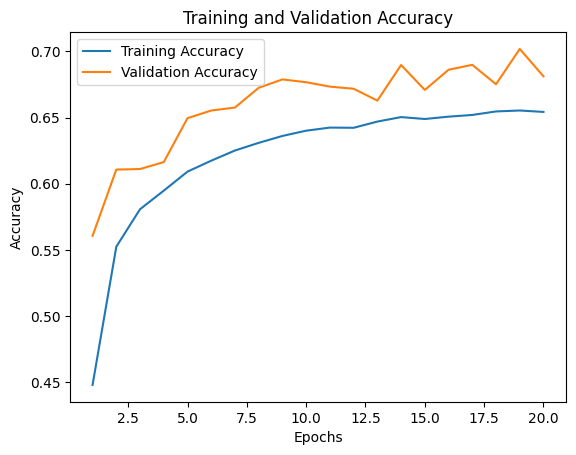

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt

df = data

# Feature columns
feature_columns = ['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx', 'gry', 'grz', 'subject']

# Target column
target_column = 'Activity'

# Extract features and target
X = df[feature_columns]
y = df[target_column]

# One-hot encode the 'subject' column
X['subject'] = pd.Categorical(X['subject'])
X['subject'] = X['subject'].cat.codes

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape sequences for RNN input
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Define the RNN model with dropout
model = Sequential()
model.add(SimpleRNN(100, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation='relu'))
model.add(Dropout(0.2))  # Adding dropout layer
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))  # Adding dropout layer
model.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile the model with class weights
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define a generator to yield batches of sequences
def sequence_generator(data, labels, batch_size):
    num_samples = data.shape[0]
    num_batches = num_samples // batch_size

    while True:
        indices = np.arange(num_samples)

        for i in range(num_batches):
            start_idx = i * batch_size
            end_idx = (i + 1) * batch_size
            batch_indices = indices[start_idx:end_idx]

            batch_data = data[batch_indices]
            batch_labels = labels[batch_indices]

            yield batch_data, batch_labels

# Create generators for training and testing
batch_size = 32
train_generator = sequence_generator(X_train_reshaped, y_train, batch_size)
test_generator = sequence_generator(X_test_reshaped, y_test, batch_size)

# Define a callback to store accuracy values
class AccuracyHistory(Callback):
    def on_train_begin(self, logs={}):
        self.acc = []
        self.val_acc = []

    def on_epoch_end(self, epoch, logs={}):
        self.acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))

# Instantiate the callback
history = AccuracyHistory()

# Train the model with class weights and epoch reporting callback
model.fit(train_generator, steps_per_epoch=len(X_train_reshaped) // batch_size, epochs=20,
          validation_data=test_generator, validation_steps=len(X_test_reshaped) // batch_size,
          class_weight=class_weights_dict, callbacks=[history])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(X_test_reshaped) // batch_size)
print(f"\nFinal Accuracy: {test_accuracy}")

# Plot the training and validation accuracy across epochs
plt.plot(range(1, len(history.acc) + 1), history.acc, label='Training Accuracy')
plt.plot(range(1, len(history.val_acc) + 1), history.val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
